In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
building6 = pd.read_csv("building 6.csv")

In [3]:
building6

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,1,34.6,2019-07-25 02:00:00,2019,7,25,2,0,Building6
1,5,35.2,2019-07-25 03:00:00,2019,7,25,3,0,Building6
2,9,36.0,2019-07-25 04:00:00,2019,7,25,4,0,Building6
3,13,36.0,2019-07-25 05:00:00,2019,7,25,5,0,Building6
4,17,37.0,2019-07-25 06:00:00,2019,7,25,6,0,Building6
...,...,...,...,...,...,...,...,...,...
10585,44613,28.0,2020-10-31 19:00:00,2020,10,31,19,0,Building6
10586,44617,26.8,2020-10-31 20:00:00,2020,10,31,20,0,Building6
10587,44621,25.4,2020-10-31 21:00:00,2020,10,31,21,0,Building6
10588,44625,26.2,2020-10-31 22:00:00,2020,10,31,22,0,Building6


In [4]:
building6['datetime']=pd.to_datetime(building6['datetime'], format='%Y-%m-%d %H:%M:%S')

building6= building6.set_index('datetime')

building6= building6.asfreq('H')

<AxesSubplot:xlabel='datetime'>

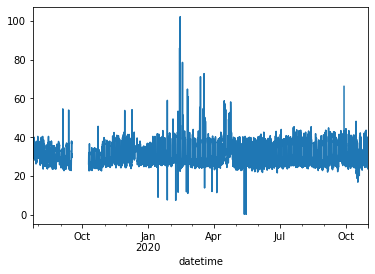

In [5]:
building6["series_value"].plot()

In [6]:
end_train='2019-12-31 23:00'

start_test='2020-01-01 00:00'

building6train = building6.loc[:end_train,:]

building6test =building6.loc[start_test:, :]

In [7]:
building6train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-07-25 02:00:00,1.0,34.6,2019.0,7.0,25.0,2.0,0.0,Building6
2019-07-25 03:00:00,5.0,35.2,2019.0,7.0,25.0,3.0,0.0,Building6
2019-07-25 04:00:00,9.0,36.0,2019.0,7.0,25.0,4.0,0.0,Building6
2019-07-25 05:00:00,13.0,36.0,2019.0,7.0,25.0,5.0,0.0,Building6
2019-07-25 06:00:00,17.0,37.0,2019.0,7.0,25.0,6.0,0.0,Building6
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,15333.0,26.8,2019.0,12.0,31.0,19.0,0.0,Building6
2019-12-31 20:00:00,15337.0,25.8,2019.0,12.0,31.0,20.0,0.0,Building6
2019-12-31 21:00:00,15341.0,31.6,2019.0,12.0,31.0,21.0,0.0,Building6


In [8]:
building6test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-01-01 00:00:00,15353.0,30.0,2020.0,1.0,1.0,0.0,0.0,Building6
2020-01-01 01:00:00,15357.0,31.6,2020.0,1.0,1.0,1.0,0.0,Building6
2020-01-01 02:00:00,15361.0,32.8,2020.0,1.0,1.0,2.0,0.0,Building6
2020-01-01 03:00:00,15365.0,32.0,2020.0,1.0,1.0,3.0,0.0,Building6
2020-01-01 04:00:00,15369.0,33.2,2020.0,1.0,1.0,4.0,0.0,Building6
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,44613.0,28.0,2020.0,10.0,31.0,19.0,0.0,Building6
2020-10-31 20:00:00,44617.0,26.8,2020.0,10.0,31.0,20.0,0.0,Building6
2020-10-31 21:00:00,44621.0,25.4,2020.0,10.0,31.0,21.0,0.0,Building6


In [9]:
train_b6 = building6train.reset_index()[["datetime","series_value"]]
train_b6.columns=["ds","y"]
train_b6

,ds,y
0,2019-07-25 02:00:00,34.6
1,2019-07-25 03:00:00,35.2
2,2019-07-25 04:00:00,36.0
3,2019-07-25 05:00:00,36.0
4,2019-07-25 06:00:00,37.0
...,...,...
3833,2019-12-31 19:00:00,26.8
3834,2019-12-31 20:00:00,25.8
3835,2019-12-31 21:00:00,31.6
3836,2019-12-31 22:00:00,30.4


In [10]:
model_b6 = Prophet()
model_b6.fit(train_b6)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_b6 = model_b6.make_future_dataframe(periods=7320,freq="H")

In [12]:
future_b6

,ds
0,2019-07-25 02:00:00
1,2019-07-25 03:00:00
2,2019-07-25 04:00:00
3,2019-07-25 05:00:00
4,2019-07-25 06:00:00
...,...
11153,2020-10-31 19:00:00
11154,2020-10-31 20:00:00
11155,2020-10-31 21:00:00
11156,2020-10-31 22:00:00


In [13]:
forecast_b6 = model_b6.predict(future_b6)

In [14]:
forecast_b6
#forecast_b6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-25 02:00:00,32.986692,33.726559,40.897130,32.986692,32.986692,4.415736,4.415736,4.415736,2.945187,2.945187,2.945187,1.470549,1.470549,1.470549,0.0,0.0,0.0,37.402428
1,2019-07-25 03:00:00,32.981657,33.641303,41.025901,32.981657,32.981657,4.330380,4.330380,4.330380,2.844739,2.844739,2.844739,1.485640,1.485640,1.485640,0.0,0.0,0.0,37.312037
2,2019-07-25 04:00:00,32.976622,33.539445,41.366056,32.976622,32.976622,4.452427,4.452427,4.452427,2.950515,2.950515,2.950515,1.501911,1.501911,1.501911,0.0,0.0,0.0,37.429049
3,2019-07-25 05:00:00,32.971587,33.809596,41.501353,32.971587,32.971587,4.615185,4.615185,4.615185,3.095898,3.095898,3.095898,1.519287,1.519287,1.519287,0.0,0.0,0.0,37.586772
4,2019-07-25 06:00:00,32.966552,33.653238,41.224378,32.966552,32.966552,4.454393,4.454393,4.454393,2.916757,2.916757,2.916757,1.537635,1.537635,1.537635,0.0,0.0,0.0,37.420945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11153,2020-10-31 19:00:00,7.911714,-35.851123,41.014207,-29.724961,46.864030,-5.998734,-5.998734,-5.998734,-1.859629,-1.859629,-1.859629,-4.139106,-4.139106,-4.139106,0.0,0.0,0.0,1.912980
11154,2020-10-31 20:00:00,7.908686,-35.748652,40.663529,-29.738323,46.866837,-5.053566,-5.053566,-5.053566,-0.969573,-0.969573,-0.969573,-4.083993,-4.083993,-4.083993,0.0,0.0,0.0,2.855120
11155,2020-10-31 21:00:00,7.905658,-33.254461,43.144078,-29.751685,46.869644,-3.814735,-3.814735,-3.814735,0.196765,0.196765,0.196765,-4.011500,-4.011500,-4.011500,0.0,0.0,0.0,4.090923
11156,2020-10-31 22:00:00,7.902629,-32.827319,44.709146,-29.765047,46.872451,-2.481334,-2.481334,-2.481334,1.440830,1.440830,1.440830,-3.922164,-3.922164,-3.922164,0.0,0.0,0.0,5.421296


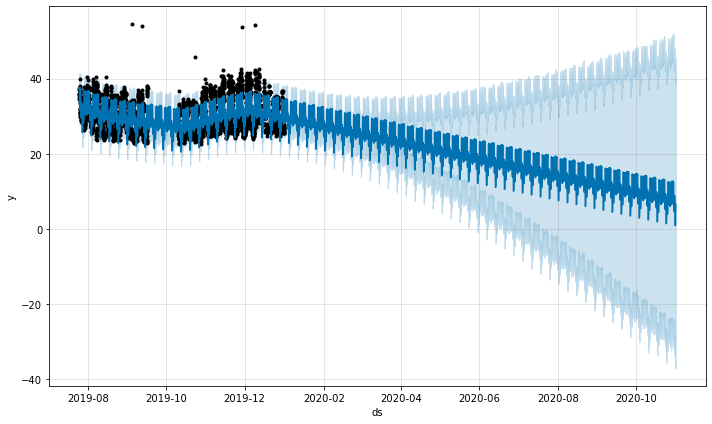

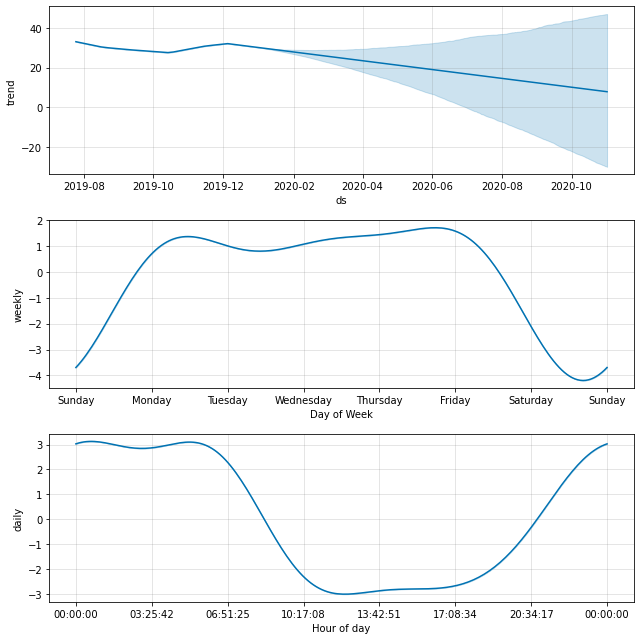

In [15]:
# plot the prediction 
fig= model_b6.plot(forecast_b6)
#plot predictions 
fig= model_b6.plot_components(forecast_b6)

In [16]:
forecast_b6["additive_terms"]
additive_terms =  pd.DataFrame(forecast_b6["additive_terms"])
additive_terms

,additive_terms
0,4.415736
1,4.330380
2,4.452427
3,4.615185
4,4.454393
...,...
11153,-5.998734
11154,-5.053566
11155,-3.814735
11156,-2.481334


In [17]:
building6["series_value"]
actual_value = pd.DataFrame(building6.reset_index()["series_value"])
actual_value

,series_value
0,34.6
1,35.2
2,36.0
3,36.0
4,37.0
...,...
11153,28.0
11154,26.8
11155,25.4
11156,26.2


In [18]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(building6.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_b6["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2019-07-25 02:00:00,30.184264,4.415736,34.6
1,2019-07-25 03:00:00,30.869620,4.330380,35.2
2,2019-07-25 04:00:00,31.547573,4.452427,36.0
3,2019-07-25 05:00:00,31.384815,4.615185,36.0
4,2019-07-25 06:00:00,32.545607,4.454393,37.0
...,...,...,...,...
11153,2020-10-31 19:00:00,33.998734,-5.998734,28.0
11154,2020-10-31 20:00:00,31.853566,-5.053566,26.8
11155,2020-10-31 21:00:00,29.214735,-3.814735,25.4
11156,2020-10-31 22:00:00,28.681334,-2.481334,26.2


In [19]:
output.to_csv("b6_actual_additive.csv",index=False)